<a href="https://colab.research.google.com/github/Hidayathamir/so_survey_professional_backend_analysis/blob/main/so_survey_professional_backend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the data

Download

In [2]:
!wget https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip

--2021-12-07 08:32:45--  https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip
Resolving info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)... 104.17.72.206, 104.17.70.206, 104.17.71.206, ...
Connecting to info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)|104.17.72.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8825103 (8.4M) [application/zip]
Saving to: ‘stack-overflow-developer-survey-2021.zip’

stack-overflow-deve 100%[===================>]   8.42M  48.7MB/s    in 0.2s    

2021-12-07 08:32:45 (48.7 MB/s) - ‘stack-overflow-developer-survey-2021.zip’ saved [8825103/8825103]



Extract

In [3]:
!unzip stack-overflow-developer-survey-2021.zip

Archive:  stack-overflow-developer-survey-2021.zip
  inflating: README_2021.txt         
  inflating: so_survey_2021.pdf      
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


Load

In [4]:
df = pd.read_csv('survey_results_public.csv')

# Exploration

All data

In [5]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

Detail column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

Drop row if used_column is Null

In [7]:
used_column = ['MainBranch', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith']
df = df.dropna(subset=used_column)

Only see professional backend developer

In [8]:
main_branch_profession_filter = df.MainBranch.str.contains('I am a developer by profession')
dev_type_backend_filter = df.DevType.str.contains('back-end')
df_backend_profession = df[dev_type_backend_filter & main_branch_profession_filter]

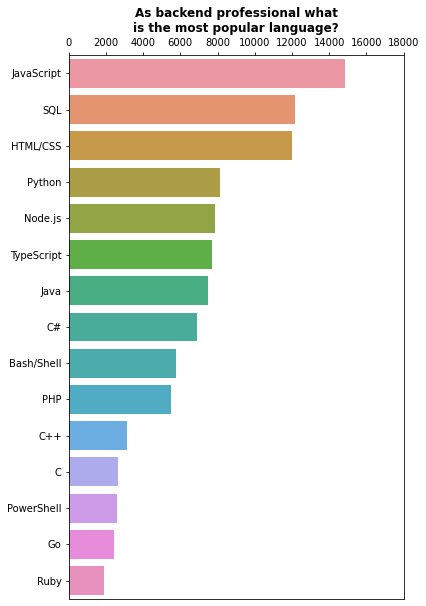

In [9]:
c = Counter()
for i in df_backend_profession.LanguageHaveWorkedWith.str.split(';'):
    c += Counter(i)
c = c.most_common()
x = [i[0] for i in c][:15]
y = [i[1] for i in c][:15]
plt.figure(figsize=(6,10))
chart = sns.barplot(x=y,y=x, orient='h')
chart.set(xlim=(0,18000))
chart.xaxis.tick_top()
chart.set_title('As backend professional what\nis the most popular language?', weight='bold')
plt.savefig('pop_lang.png')
plt.show()

Most common language want to work with

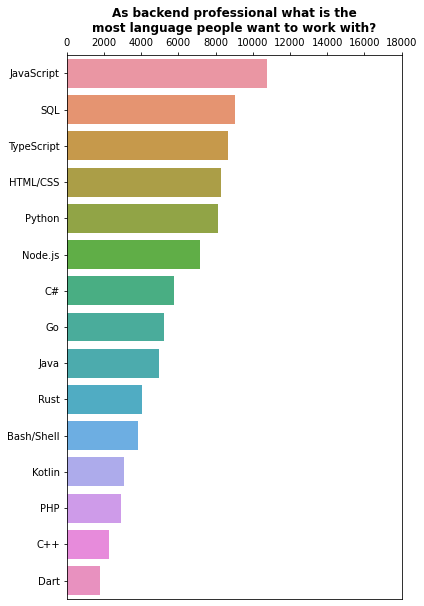

In [10]:
c = Counter()
for i in df_backend_profession.LanguageWantToWorkWith.str.split(';'):
    c += Counter(i)
c = c.most_common()
x = [i[0] for i in c][:15]
y = [i[1] for i in c][:15]
plt.figure(figsize=(6,10))
chart = sns.barplot(x=y,y=x, orient='h')
chart.set(xlim=(0,18000))
chart.xaxis.tick_top()
chart.set_title('As backend professional what is the\nmost language people want to work with?', weight='bold')
plt.savefig('want_lang.png')
plt.show()

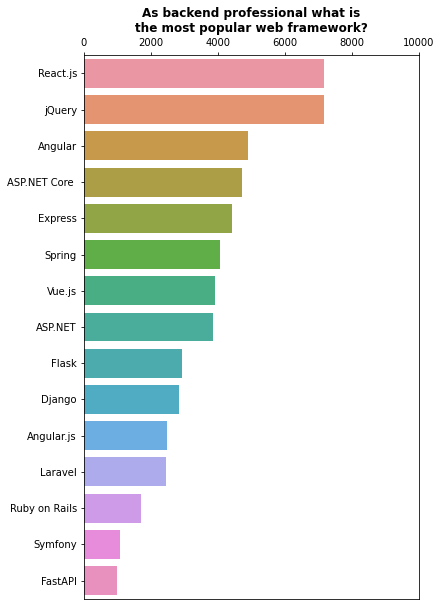

In [11]:
c = Counter()
for i in df_backend_profession.WebframeHaveWorkedWith.str.split(';'):
    c += Counter(i)
c = c.most_common()
x = [i[0] for i in c][:15]
y = [i[1] for i in c][:15]
plt.figure(figsize=(6,10))
chart = sns.barplot(x=y,y=x, orient='h')
chart.set(xlim=(0,10000))
chart.xaxis.tick_top()
chart.set_title('As backend professional what is\nthe most popular web framework?', weight='bold')
plt.savefig('pop_webfw.png')
plt.show()

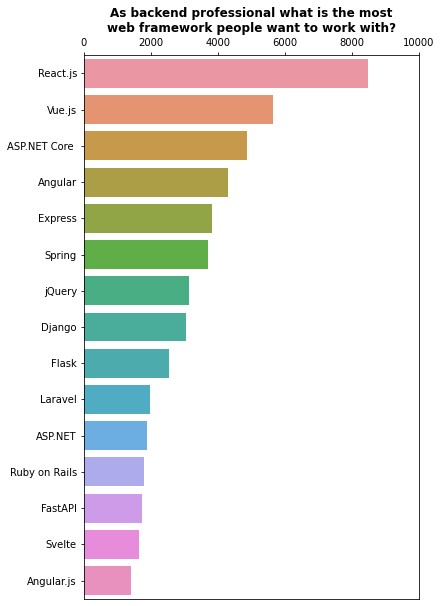

In [12]:
c = Counter()
for i in df_backend_profession.WebframeWantToWorkWith.str.split(';'):
    c += Counter(i)
c = c.most_common()
x = [i[0] for i in c][:15]
y = [i[1] for i in c][:15]
plt.figure(figsize=(6,10))
chart = sns.barplot(x=y,y=x, orient='h')
chart.set(xlim=(0,10000))
chart.xaxis.tick_top()
chart.set_title('As backend professional what is the most\nweb framework people want to work with?', weight='bold')
plt.savefig('want_webfw.png')
plt.show()